## import & load

In [1]:
import pandas as pd
import numpy as np
import sys
import requests
import pprint

from collections import defaultdict
import datetime
import pytz
import importlib
import matplotlib.pyplot as plt

import datetime, json, math
from google.cloud import bigquery
from numpy_ext import rolling_apply as rolling_apply_ext

In [2]:
import logging

logging.basicConfig(
    level=logging.INFO,
    format="%(asctime)s [%(threadName)-12.12s] [%(levelname)-5.5s]  %(message)s",
    handlers=[
        logging.StreamHandler(sys.stdout)
    ]
)

In [3]:
import os

if os.path.exists('credential.json'):
    os.environ["GOOGLE_APPLICATION_CREDENTIALS"] = os.path.join(os.getcwd(), 'credential.json')
    os.environ["GOOGLE_CLOUD_PROJECT"] = "trading-290017"
else:
    print('the credential.json file does not exist')

import importlib

In [4]:
import market_data.ingest.bq.cache
importlib.reload(market_data.ingest.bq.cache)
importlib.reload(market_data.ingest.bq.candle)

<module 'market_data.ingest.bq.candle' from '/home/junlim/projects/jitter_recovery/market_data/ingest/bq/candle.py'>

In [29]:
date_str_from='2023-12-01'
date_str_to='2024-01-01'
dataset_mode = market_data.ingest.bq.common.DATASET_MODE.OKX
export_mode = market_data.ingest.bq.common.EXPORT_MODE.BY_MINUTE
df = market_data.ingest.bq.cache.fetch_and_cache(
    dataset_mode, 
    export_mode, 
    market_data.ingest.bq.common.AGGREGATION_MODE.TAKE_LASTEST,
    date_str_from=date_str_from, date_str_to=date_str_to)
df_close = df.pivot(index='timestamp', columns='symbol', values='close')
dfi = df.set_index(['timestamp', 'symbol'])

In [27]:
all_symbols = df.symbol.unique()
all_symbols = [s for s in all_symbols if s]
len([s for s in all_symbols if 'USDT' in s])

164

## calculate/cache features

In [7]:
import algo.jitter_recovery.calculate
importlib.reload(algo.jitter_recovery.calculate)
import algo.collective_jitter_recovery.calculate
importlib.reload(algo.collective_jitter_recovery.calculate)
import algo.jitter_recovery.research
importlib.reload(algo.jitter_recovery.research)
import algo.collective_jitter_recovery.research
importlib.reload(algo.collective_jitter_recovery.research)
import algo.cache
importlib.reload(algo.cache)

<module 'algo.cache' from '/home/junlim/projects/jitter_recovery/algo/cache.py'>

In [8]:
feature_param = algo.collective_jitter_recovery.calculate.CollectiveRecoveryFeatureParam(window=40, collective_window=30)

In [22]:
algo.collective_jitter_recovery.research.get_feature_label_for_caching(feature_param)

'(collectivechanges)_window(40)_collective_window(30)'

In [9]:
import market_data.ingest.bq.common
dataset_mode = market_data.ingest.bq.common.DATASET_MODE.OKX
export_mode = market_data.ingest.bq.common.EXPORT_MODE.BY_MINUTE

In [24]:
dfst_feature = algo.cache.read_df(
    label = algo.collective_jitter_recovery.research.get_feature_label_for_caching(feature_param),
    dataset_mode = market_data.ingest.bq.common.DATASET_MODE.OKX,
    export_mode = market_data.ingest.bq.common.EXPORT_MODE.BY_MINUTE,
    date_str_from='2023-12-01', 
    date_str_to='2024-01-01')

AttributeError: module 'market_data.ingest.bq.cache' has no attribute 'split_t_range'

## multiple symbols

In [22]:
import algo.jitter_recovery.calculate
importlib.reload(algo.jitter_recovery.calculate)
import algo.collective_jitter_recovery.calculate
importlib.reload(algo.collective_jitter_recovery.calculate)
import algo.jitter_recovery.research
importlib.reload(algo.jitter_recovery.research)
import algo.collective_jitter_recovery.research
importlib.reload(algo.collective_jitter_recovery.research)
import algo.cache
importlib.reload(algo.cache)

<module 'algo.cache' from '/home/junlim/projects/jitter_recovery/algo/cache.py'>

In [9]:
trading_param = algo.collective_jitter_recovery.calculate.CollectiveRecoveryTradingParam(
    feature_param, 
    collective_drop_recovery_trading_param = algo.collective_jitter_recovery.calculate.CollectiveDropRecoveryTradingParam(
        -0.10, -0.30, -0.15, +0.04, -0.02),
    collective_jump_recovery_trading_param = None,
)

In [11]:
trading_param = algo.collective_jitter_recovery.calculate.CollectiveRecoveryTradingParam(
    feature_param, 
    collective_drop_recovery_trading_param = algo.collective_jitter_recovery.calculate.CollectiveDropRecoveryTradingParam(
        -0.03, -0.30, -0.03, +0.005, -0.01),
    collective_jump_recovery_trading_param = None,
)

In [101]:
trading_param = algo.collective_jitter_recovery.calculate.CollectiveRecoveryTradingParam(
    feature_param, 
    collective_drop_recovery_trading_param = algo.collective_jitter_recovery.calculate.CollectiveDropRecoveryTradingParam(
        -0.03, -0.30, -0.06, +0.03, -0.01),
    collective_jump_recovery_trading_param = None,
)

In [42]:
trading_param = algo.collective_jitter_recovery.calculate.CollectiveRecoveryTradingParam(
    feature_param, 
    collective_drop_recovery_trading_param = None,
    collective_jump_recovery_trading_param = algo.collective_jitter_recovery.calculate.CollectiveJumpRecoveryTradingParam(
        0.03, 0.15, 0.03, -0.005, 0.01),
)

In [43]:
trading_param = algo.collective_jitter_recovery.calculate.CollectiveRecoveryTradingParam(
    feature_param, 
    collective_drop_recovery_trading_param = None,
    collective_jump_recovery_trading_param = algo.collective_jitter_recovery.calculate.CollectiveJumpRecoveryTradingParam(
        0.03, 0.15, 0.06, -0.03, 0.01),
)

In [12]:
import algo.jitter_recovery.calculate
importlib.reload(algo.jitter_recovery.calculate)
import algo.collective_jitter_recovery.calculate
importlib.reload(algo.collective_jitter_recovery.calculate)
import algo.jitter_recovery.research
importlib.reload(algo.jitter_recovery.research)
import algo.collective_jitter_recovery.research
importlib.reload(algo.collective_jitter_recovery.research)
import algo.cache
importlib.reload(algo.cache)

<module 'algo.cache' from '/home/junlim/projects/jitter_recovery/algo/cache.py'>

In [13]:
trading_param = algo.collective_jitter_recovery.calculate.CollectiveRecoveryTradingParam(
    feature_param, 
    collective_drop_recovery_trading_param = algo.collective_jitter_recovery.calculate.CollectiveDropRecoveryTradingParam(
        -0.03, -0.30, -0.03, +0.005, -0.01),
    collective_jump_recovery_trading_param = None,
)

In [10]:
algo.collective_jitter_recovery.research.get_trading_label_for_caching(trading_param)

'(collectivechanges_trading)_feature_param(window(40)_collective_window(30))_collective_drop_recovery_trading_param(collective_drop_threshold(-0.03)_collective_drop_lower_threshold(-0.3)_drop_threshold(-0.03)_jump_from_drop_threshold(0.005)/exit_drop_threshold(-0.01))_collective_jump_recovery_trading_param(None)'

In [32]:
dfst_trading = algo.collective_jitter_recovery.research.get_dfst_trading(dfst_feature, trading_param)

0 symbol: 1INCH-USDT-SWAP (365):(trading)
1 symbol: AAVE-USDT-SWAP (592):(trading)
2 symbol: ADA-USDT-SWAP (574):(trading)
3 symbol: AGIX-USDT-SWAP (550):(trading)
4 symbol: AGLD-USDT-SWAP (2031):(trading)
5 symbol: AIDOGE-USDT-SWAP (4855):(trading)
6 symbol: ALGO-USDT-SWAP (617):(trading)
7 symbol: ALPHA-USDT-SWAP (1373):(trading)
8 symbol: ANT-USDT-SWAP (39):(trading)
9 symbol: APE-USDT-SWAP (288):(trading)
10 symbol: API3-USDT-SWAP (713):(trading)
11 symbol: APT-USDT-SWAP (586):(trading)
12 symbol: AR-USDT-SWAP (749):(trading)
13 symbol: ARB-USDT-SWAP (678):(trading)
14 symbol: ATOM-USDT-SWAP (487):(trading)
15 symbol: AUCTION-USDT-SWAP (7994):(trading)
16 symbol: AVAX-USDT-SWAP (1079):(trading)
17 symbol: AXS-USDT-SWAP (634):(trading)
18 symbol: BADGER-USDT-SWAP (1565):(trading)
19 symbol: BAL-USDT-SWAP (231):(trading)
20 symbol: BAND-USDT-SWAP (781):(trading)
21 symbol: BAT-USDT-SWAP (212):(trading)
22 symbol: BCH-USDT-SWAP (231):(trading)
23 symbol: BICO-USDT-SWAP (648):(trading)

In [34]:
algo.cache.cache_df(
    dfst_trading, 
    label = algo.collective_jitter_recovery.research.get_trading_label_for_caching(trading_param),
    dataset_mode=dataset_mode, 
    export_mode=export_mode, 
    overwrite = True)

In [34]:
dfst_trading[dfst_trading.profit != 0][['profit']].dropna().groupby('symbol').sum().sort_values('profit')

,profit
symbol,
GPT-USDT-SWAP,-0.055931
ZRX-USDT-SWAP,-0.012409
CELO-USDT-SWAP,-0.011381
CTC-USDT-SWAP,-0.011131
XCH-USDT-SWAP,-0.010403
...,...
COMP-USDT-SWAP,0.078220
AGIX-USDT-SWAP,0.083966
JUP-USDT-SWAP,0.084245


In [35]:
len(dfst_trading[dfst_trading.profit != 0][['profit']].dropna().groupby('symbol').sum().sort_values('profit'))

171

In [24]:
dfst_trading = algo.cache.read_df(
    label = algo.collective_jitter_recovery.research.get_trading_label_for_caching(trading_param),
    dataset_mode = market_data.ingest.bq.common.DATASET_MODE.OKX,
    export_mode = market_data.ingest.bq.common.EXPORT_MODE.BY_MINUTE,
    date_str_from='2024-03-01', 
    date_str_to='2024-03-21')

<Axes: xlabel='timestamp'>

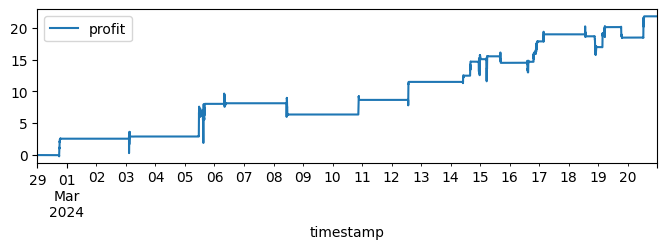

In [25]:
dfst_trading[['profit']].groupby('timestamp').sum().cumsum().plot(figsize=(8,2))

In [14]:
dfst_trading = algo.cache.read_df(
    label = algo.collective_jitter_recovery.research.get_trading_label_for_caching(trading_param),
    dataset_mode = market_data.ingest.bq.common.DATASET_MODE.OKX,
    export_mode = market_data.ingest.bq.common.EXPORT_MODE.BY_MINUTE,
    date_str_from='2024-02-01', 
    date_str_to='2024-03-01')

<Axes: xlabel='timestamp'>

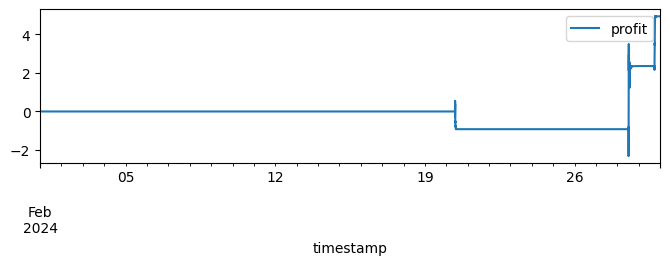

In [15]:
dfst_trading[['profit']].groupby('timestamp').sum().cumsum().plot(figsize=(8,2))

In [16]:
dfst_trading = algo.cache.read_df(
    label = algo.collective_jitter_recovery.research.get_trading_label_for_caching(trading_param),
    dataset_mode = market_data.ingest.bq.common.DATASET_MODE.OKX,
    export_mode = market_data.ingest.bq.common.EXPORT_MODE.BY_MINUTE,
    date_str_from='2024-01-02', 
    date_str_to='2024-02-01')

<Axes: xlabel='timestamp'>

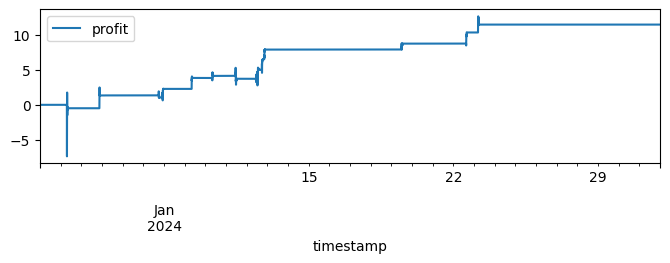

In [17]:
dfst_trading[['profit']].groupby('timestamp').sum().cumsum().plot(figsize=(8,2))

In [18]:
dfst_trading = algo.cache.read_df(
    label = algo.collective_jitter_recovery.research.get_trading_label_for_caching(trading_param),
    dataset_mode = market_data.ingest.bq.common.DATASET_MODE.OKX,
    export_mode = market_data.ingest.bq.common.EXPORT_MODE.BY_MINUTE,
    date_str_from='2023-12-02', 
    date_str_to='2024-01-01')

2024-04-02 15:15:47,578 [MainThread  ] [INFO ]  filename='/home/junlim/feature_data/(collectivechanges_trading)_feature_param(window(40)_collective_window(30))_collective_drop_recovery_trading_param(collective_drop_threshold(-0.03)_collective_drop_lower_threshold(-0.3)_drop_threshold(-0.03)_jump_from_drop_threshold(0.005)/exit_drop_threshold(-0.01))_collective_jump_recovery_trading_param(None)/trading-290017.market_data_okx.by_minute_2023-12-01T00:00:00-0500_2023-12-02T00:00:00-0500.parquet' does not exist.
2024-04-02 15:15:47,579 [MainThread  ] [INFO ]  df_cache is None for (datetime.datetime(2023, 12, 1, 0, 0, tzinfo=<DstTzInfo 'America/New_York' EST-1 day, 19:00:00 STD>), datetime.datetime(2023, 12, 2, 0, 0, tzinfo=<DstTzInfo 'America/New_York' EST-1 day, 19:00:00 STD>))


<Axes: xlabel='timestamp'>

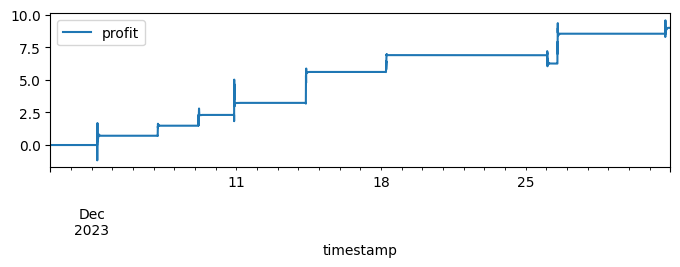

In [19]:
dfst_trading[['profit']].groupby('timestamp').sum().cumsum().plot(figsize=(8,2))

In [26]:
dfst_trading = algo.cache.read_df(
    label = algo.collective_jitter_recovery.research.get_trading_label_for_caching(trading_param),
    dataset_mode = market_data.ingest.bq.common.DATASET_MODE.OKX,
    export_mode = market_data.ingest.bq.common.EXPORT_MODE.BY_MINUTE,
    date_str_from='2023-12-02', 
    date_str_to='2024-03-21',
    columns=['profit', 'value', 'position_changed']
)

2024-04-02 15:22:16,155 [MainThread  ] [INFO ]  filename='/home/junlim/feature_data/(collectivechanges_trading)_feature_param(window(40)_collective_window(30))_collective_drop_recovery_trading_param(collective_drop_threshold(-0.03)_collective_drop_lower_threshold(-0.3)_drop_threshold(-0.03)_jump_from_drop_threshold(0.005)/exit_drop_threshold(-0.01))_collective_jump_recovery_trading_param(None)/trading-290017.market_data_okx.by_minute_2024-01-01T00:00:00-0500_2024-01-02T00:00:00-0500.parquet' does not exist.
2024-04-02 15:22:16,156 [MainThread  ] [INFO ]  df_cache is None for (datetime.datetime(2024, 1, 1, 0, 0, tzinfo=<DstTzInfo 'America/New_York' EST-1 day, 19:00:00 STD>), datetime.datetime(2024, 1, 2, 0, 0, tzinfo=<DstTzInfo 'America/New_York' EST-1 day, 19:00:00 STD>))


<Axes: xlabel='timestamp'>

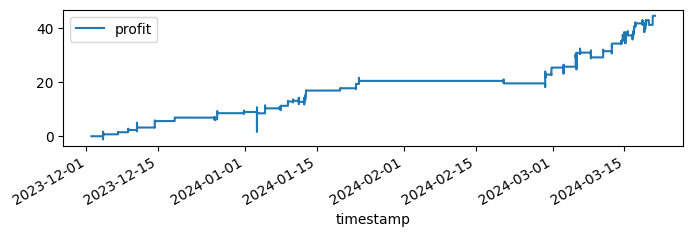

In [27]:
dfst_trading[['profit']].groupby('timestamp').sum().cumsum().plot(figsize=(8,2))

In [25]:
dfst_trading.columns

Index(['index', 'open', 'high', 'low', 'close', 'volume',
       'avg_v_before_max_ch', 'avg_v_before_min_ch', 'ch', 'ch_max', 'ch_min',
       'ch_since_max', 'ch_since_min', 'distance_max_ch', 'distance_min_ch',
       'v_ch_max_is_from', 'v_ch_max_is_to', 'v_ch_min_is_from',
       'v_ch_min_is_to', 'value', 'ch_collective', 'ch_max_collective',
       'ch_min_collective', 'ch_since_max_collective',
       'ch_since_min_collective', 'ch_std_collective',
       'ch_window30_min_collective', 'ch_window30_max_collective',
       'in_position', 'value_at_enter', 'lowest_since_enter',
       'highest_since_enter', 'ch_from_lowest_since_enter',
       'ch_from_highest_since_enter', 'timedelta_since_position_enter',
       'v_ch_max_is_to_when_enter', 'v_ch_min_is_to_when_enter',
       'v_ch_max_is_from_when_enter', 'v_ch_min_is_from_when_enter',
       'ch_from_enter', 'position_changed', 'profit_raw', 'profit'],
      dtype='object')

In [615]:
for _, row in dfst_trading[(dfst_trading.position_changed != 0)].dropna().reset_index().sort_values('timestamp').iterrows():
    if 'PERP' not in row['symbol']: continue
    print(f'{row["timestamp"]}, {row["symbol"]}, {row["value"]}, position_changed: {row["position_changed"]}')

2024-01-03 12:13:00, PERP-USDT-SWAP, 1.6581, position_changed: 1.0
2024-01-03 12:16:00, PERP-USDT-SWAP, 1.8838, position_changed: -1.0
2024-01-03 12:17:00, PERP-USDT-SWAP, 1.8575, position_changed: 1.0
2024-01-03 12:18:00, PERP-USDT-SWAP, 1.8033, position_changed: -1.0
2024-01-03 12:19:00, PERP-USDT-SWAP, 1.6796, position_changed: 1.0
2024-01-03 12:23:00, PERP-USDT-SWAP, 1.81, position_changed: -1.0
2024-01-03 12:24:00, PERP-USDT-SWAP, 1.8786, position_changed: 1.0
2024-01-03 12:25:00, PERP-USDT-SWAP, 1.801, position_changed: -1.0
2024-01-03 12:26:00, PERP-USDT-SWAP, 1.8229, position_changed: 1.0
2024-01-03 12:27:00, PERP-USDT-SWAP, 1.7579, position_changed: -1.0
2024-01-03 12:28:00, PERP-USDT-SWAP, 1.81, position_changed: 1.0
2024-01-03 12:29:00, PERP-USDT-SWAP, 1.8183, position_changed: -1.0


In [28]:
dfst_trading[dfst_trading.profit != 0][['profit']].dropna().groupby('symbol').sum().sort_values('profit')

,profit
symbol,
USTC-USDT-SWAP,-0.011166
ICP-USDT-SWAP,-0.010988
SSV-USDT-SWAP,-0.010349
ARB-USDT-SWAP,-0.000929
FET-USDT-SWAP,0.003337
INJ-USDT-SWAP,0.005184
ACE-USDT-SWAP,0.006177
LDO-USDT-SWAP,0.008632
PERP-USDT-SWAP,0.008839


In [41]:
for _, row in dfst_trading[(dfst_trading.position_changed != 0)].dropna().reset_index().sort_values('timestamp').iterrows():
    print(f'{row["timestamp"]}, {row["symbol"]}, {row["value"]}, position_changed: {row["position_changed"]}')

2024-01-03 13:14:00, ACE-USDT-SWAP, 8.439, position_changed: 1.0
2024-01-03 13:14:00, ICP-USDT-SWAP, 14.342, position_changed: 1.0
2024-01-03 13:14:00, LDO-USDT-SWAP, 3.128, position_changed: 1.0
2024-01-03 13:14:00, INJ-USDT-SWAP, 33.573, position_changed: 1.0
2024-01-03 13:14:00, PEOPLE-USDT-SWAP, 0.0178, position_changed: 1.0
2024-01-03 13:14:00, ORDI-USDT-SWAP, 76.4, position_changed: 1.0
2024-01-03 13:14:00, WSM-USDT-SWAP, 0.01654, position_changed: 1.0
2024-01-03 13:14:00, FET-USDT-SWAP, 0.6612, position_changed: 1.0
2024-01-03 13:14:00, SSV-USDT-SWAP, 27.92, position_changed: 1.0
2024-01-03 13:14:00, PERP-USDT-SWAP, 1.8153, position_changed: 1.0
2024-01-03 13:15:00, USTC-USDT-SWAP, 0.02776, position_changed: 1.0
2024-01-03 13:15:00, LDO-USDT-SWAP, 3.155, position_changed: -1.0
2024-01-03 13:15:00, PEOPLE-USDT-SWAP, 0.01848, position_changed: -1.0
2024-01-03 13:15:00, ARB-USDT-SWAP, 1.8717, position_changed: 1.0
2024-01-03 13:19:00, INJ-USDT-SWAP, 33.746, position_changed: -1.0
2

## single symobl

In [303]:
import algo.jitter_recovery.calculate
importlib.reload(algo.jitter_recovery.calculate)
import algo.collective_jitter_recovery.calculate
importlib.reload(algo.collective_jitter_recovery.calculate)
import algo.jitter_recovery.research
importlib.reload(algo.jitter_recovery.research)
import algo.collective_jitter_recovery.research
importlib.reload(algo.collective_jitter_recovery.research)

<module 'algo.collective_jitter_recovery.research' from '/home/junlim/projects/jitter_recovery/algo/collective_jitter_recovery/research.py'>

In [299]:
symbol_investigate = 'PEPE-USDT-SWAP'
dfs = dfi.xs(symbol_investigate, level=1)

/home/junlim/projects/jitter_recovery/algo/collective_jitter_recovery/research.py:109: FutureWarning: Indexing a timezone-naive DatetimeIndex with a timezone-aware datetime is deprecated and will raise KeyError in a future version.  Use a timezone-naive object instead.
  if i in df_collective_feature.index:


no trading happens


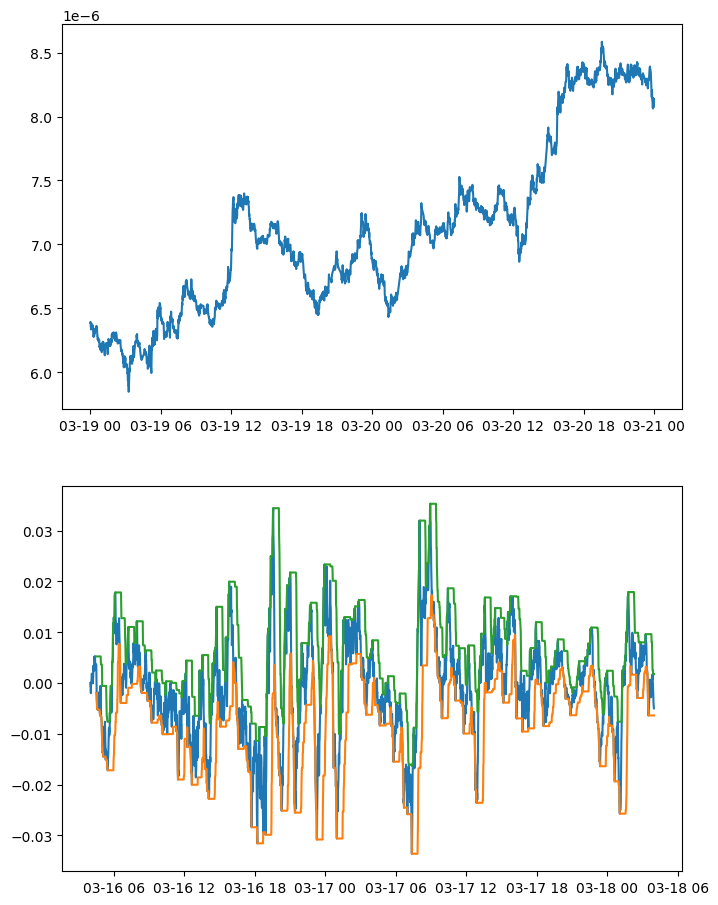

In [302]:
df_feature, df_trading = algo.collective_jitter_recovery.research.investigate_symbol(df, df_collective_feature, symbol_investigate, trading_param, figsize=(8, 11))

In [44]:
df_trading.columns

Index(['avg_v_before_max_ch', 'avg_v_before_min_ch', 'ch', 'ch_max', 'ch_min',
       'ch_since_max', 'ch_since_min', 'distance_max_ch', 'distance_min_ch',
       'v_ch_max_is_from', 'v_ch_max_is_to', 'v_ch_min_is_from',
       'v_ch_min_is_to', 'value', 'in_position', 'value_at_enter',
       'lowest_since_enter', 'highest_since_enter',
       'ch_from_lowest_since_enter', 'ch_from_highest_since_enter',
       'timedelta_since_position_enter', 'v_ch_max_is_to_when_enter',
       'v_ch_min_is_to_when_enter', 'v_ch_max_is_from_when_enter',
       'v_ch_min_is_from_when_enter', 'ch_from_enter', 'ch_collective',
       'ch_max_collective', 'ch_min_collective', 'ch_since_max_collective',
       'ch_since_min_collective', 'ch_window30_min_collective',
       'ch_window30_max_collective', 'ch_window60_min_collective',
       'ch_window60_max_collective', 'position_changed', 'profit_raw',
       'profit'],
      dtype='object')

<Axes: xlabel='timestamp'>

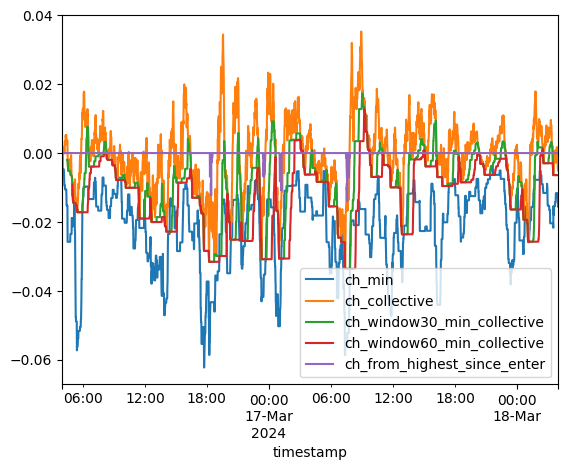

In [45]:
df_trading[['ch_min', 'ch_collective', 'ch_window30_min_collective', 'ch_window60_min_collective', 'ch_from_highest_since_enter']].plot()

In [577]:
df_trading[(df_trading.position_changed != 0)][['value', 'in_position', 'position_changed', 'profit_raw', 'profit']].dropna()

,value,in_position,position_changed,profit_raw,profit
timestamp,,,,,
2024-01-03 12:13:00,0.000265,1,1.0,0.000000,0.000000
2024-01-03 12:16:00,0.000258,0,-1.0,-0.000014,-0.052225
2024-01-03 12:17:00,0.000275,1,1.0,0.000000,0.000000
2024-01-03 12:19:00,0.000269,0,-1.0,-0.000015,-0.053502
2024-01-03 12:20:00,0.000279,1,1.0,0.000000,0.000000
2024-01-03 12:26:00,0.000283,0,-1.0,0.000008,0.029080
2024-01-03 12:27:00,0.000278,1,1.0,-0.000000,-0.000000
2024-01-03 12:32:00,0.000286,0,-1.0,-0.000004,-0.012440


In [578]:
for _, row in dfst_trading[(dfst_trading.position_changed != 0)].dropna().reset_index().sort_values('timestamp').iterrows():
    if row['symbol'] != symbol_investigate: continue
    print(f'{row["timestamp"]}, {row["symbol"]}, {row["value"]}, position_changed: {row["position_changed"]}')

2024-01-03 12:13:00, TURBO-USDT-SWAP, 0.0002649, position_changed: 1.0
2024-01-03 12:16:00, TURBO-USDT-SWAP, 0.0002577, position_changed: -1.0
2024-01-03 12:17:00, TURBO-USDT-SWAP, 0.0002746, position_changed: 1.0
2024-01-03 12:19:00, TURBO-USDT-SWAP, 0.0002689, position_changed: -1.0
2024-01-03 12:20:00, TURBO-USDT-SWAP, 0.0002791, position_changed: 1.0
2024-01-03 12:26:00, TURBO-USDT-SWAP, 0.0002831, position_changed: -1.0
2024-01-03 12:27:00, TURBO-USDT-SWAP, 0.0002781, position_changed: 1.0
2024-01-03 12:32:00, TURBO-USDT-SWAP, 0.0002858, position_changed: -1.0
